Investigate inversion methods using Capture One Pro

In [1]:
%matplotlib inline
from pathlib import Path

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.cluster import MiniBatchKMeans

In [2]:
data_path = Path('/Users/jeremy/Pictures/Untitled Session2/Output')

image_paths_list = sorted(data_path.glob('*.tif'))

number_of_images = len(image_paths_list)
number_of_images

5

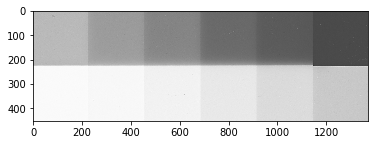

In [4]:
image = cv2.imread(str(image_paths_list[0]))

plt.imshow(image)

In [5]:
def blur_image(image_path):
    
    image_cv2 = cv2.imread(str(image_path))
    
    if len(image_cv2.shape) > 2:  # NOT grayscale
        image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)
    
    image_blurred = cv2.bilateralFilter(image_cv2, 21, 21, 21)
    
    return image_blurred


def quantize(image_blurred, number_of_clusters = 5):
    
    if len(image_blurred.shape) < 3:  # image grayscale
        image_blurred = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2BGR)
        
    image_blurred = cv2.cvtColor(image_blurred, cv2.COLOR_BGR2LAB)
    h, w = image_blurred.shape[:2]
    
    reshaped_image = image_blurred.reshape((image_blurred.shape[0] * image_blurred.shape[1], 3))
    
    # apply k-means using the specified number of clusters and
    # then create the quantizedized reshaped based on the predictions
    clt = MiniBatchKMeans(n_clusters = number_of_clusters)
    labels = clt.fit_predict(reshaped_image)
    quantized = clt.cluster_centers_.astype("uint8")[labels]
 
    # reshape the feature vectors to reshapeds
    quantized = quantized.reshape((h, w, 3))
    #reshaped = reshaped_image.reshape((h, w, 3))
 
    # convert from L*a*b* to RGB
    quantized = cv2.cvtColor(quantized, cv2.COLOR_LAB2BGR)
    #image = cv2.cvtColor(reshaped, cv2.COLOR_LAB2BGR)
    
    return quantized

def equalize(quantized_image):
    image_gray = cv2.cvtColor(quantized_image, cv2.COLOR_BGR2GRAY)
    image_equalized = cv2.equalizeHist(image_gray)
    return image_equalized

In [11]:
image_blurred = blur_image(image_paths_list[0])

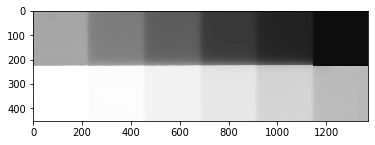

In [13]:
plt.imshow(image_blurred, cmap='gray')

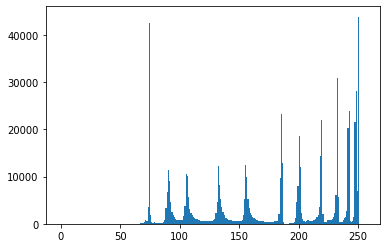

In [16]:
# plot histogram
plt.hist(image_blurred.ravel(),256,[0,256]); plt.show()

In [26]:
image_paths_list

[PosixPath('/Users/jeremy/Pictures/Untitled Session2/Output/inverted-with-curves-luma.tif'),
 PosixPath('/Users/jeremy/Pictures/Untitled Session2/Output/inverted-with-curves-rgb.tif'),
 PosixPath('/Users/jeremy/Pictures/Untitled Session2/Output/inverted-with-levels.tif'),
 PosixPath('/Users/jeremy/Pictures/Untitled Session2/Output/positive-image.tif'),
 PosixPath('/Users/jeremy/Pictures/Untitled Session2/Output/technical-process-2.tif')]

In [27]:
image_tech2 = cv2.imread(str(image_paths_list[-1]))

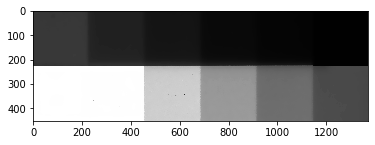

In [29]:
image_tech2_blurred = blur_image(image_paths_list[-1])
plt.imshow(image_tech2_blurred, cmap='gray')

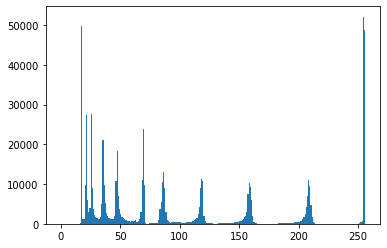

In [30]:
# plot histogram
plt.hist(image_tech2_blurred.ravel(),256,[0,256]); plt.show()

In [18]:
# blur each image and add it to a dictionary we can loop through

image_dict = {}
for image_path in image_paths_list:
    image_blurred = blur_image(image_path)
    image_dict.update( {image_path : image_blurred} )
image_dict

{PosixPath('/Users/jeremy/Pictures/Untitled Session2/Output/inverted-with-curves-luma.tif'): array([[196, 206, 207, ...,  73,  73,  73],
        [199, 189, 183, ...,  73,  73,  73],
        [183, 183, 184, ...,  73,  73,  73],
        ...,
        [250, 250, 250, ..., 197, 197, 197],
        [250, 250, 250, ..., 197, 197, 197],
        [250, 250, 250, ..., 197, 197, 197]], dtype=uint8),
 PosixPath('/Users/jeremy/Pictures/Untitled Session2/Output/inverted-with-curves-rgb.tif'): array([[197, 207, 208, ...,  72,  72,  72],
        [199, 189, 183, ...,  72,  72,  72],
        [183, 183, 183, ...,  72,  72,  72],
        ...,
        [250, 250, 250, ..., 197, 197, 197],
        [250, 250, 250, ..., 197, 197, 197],
        [250, 250, 250, ..., 197, 197, 197]], dtype=uint8),
 PosixPath('/Users/jeremy/Pictures/Untitled Session2/Output/inverted-with-levels.tif'): array([[197, 207, 208, ...,  72,  72,  72],
        [199, 189, 183, ...,  72,  72,  72],
        [183, 183, 183, ...,  72,  72,  72],

In [25]:
for key, value in image_dict:
    print(f'key: {key}')
    print(f'value: {value}')

TypeError: cannot unpack non-iterable PosixPath object

TypeError: cannot unpack non-iterable PosixPath object

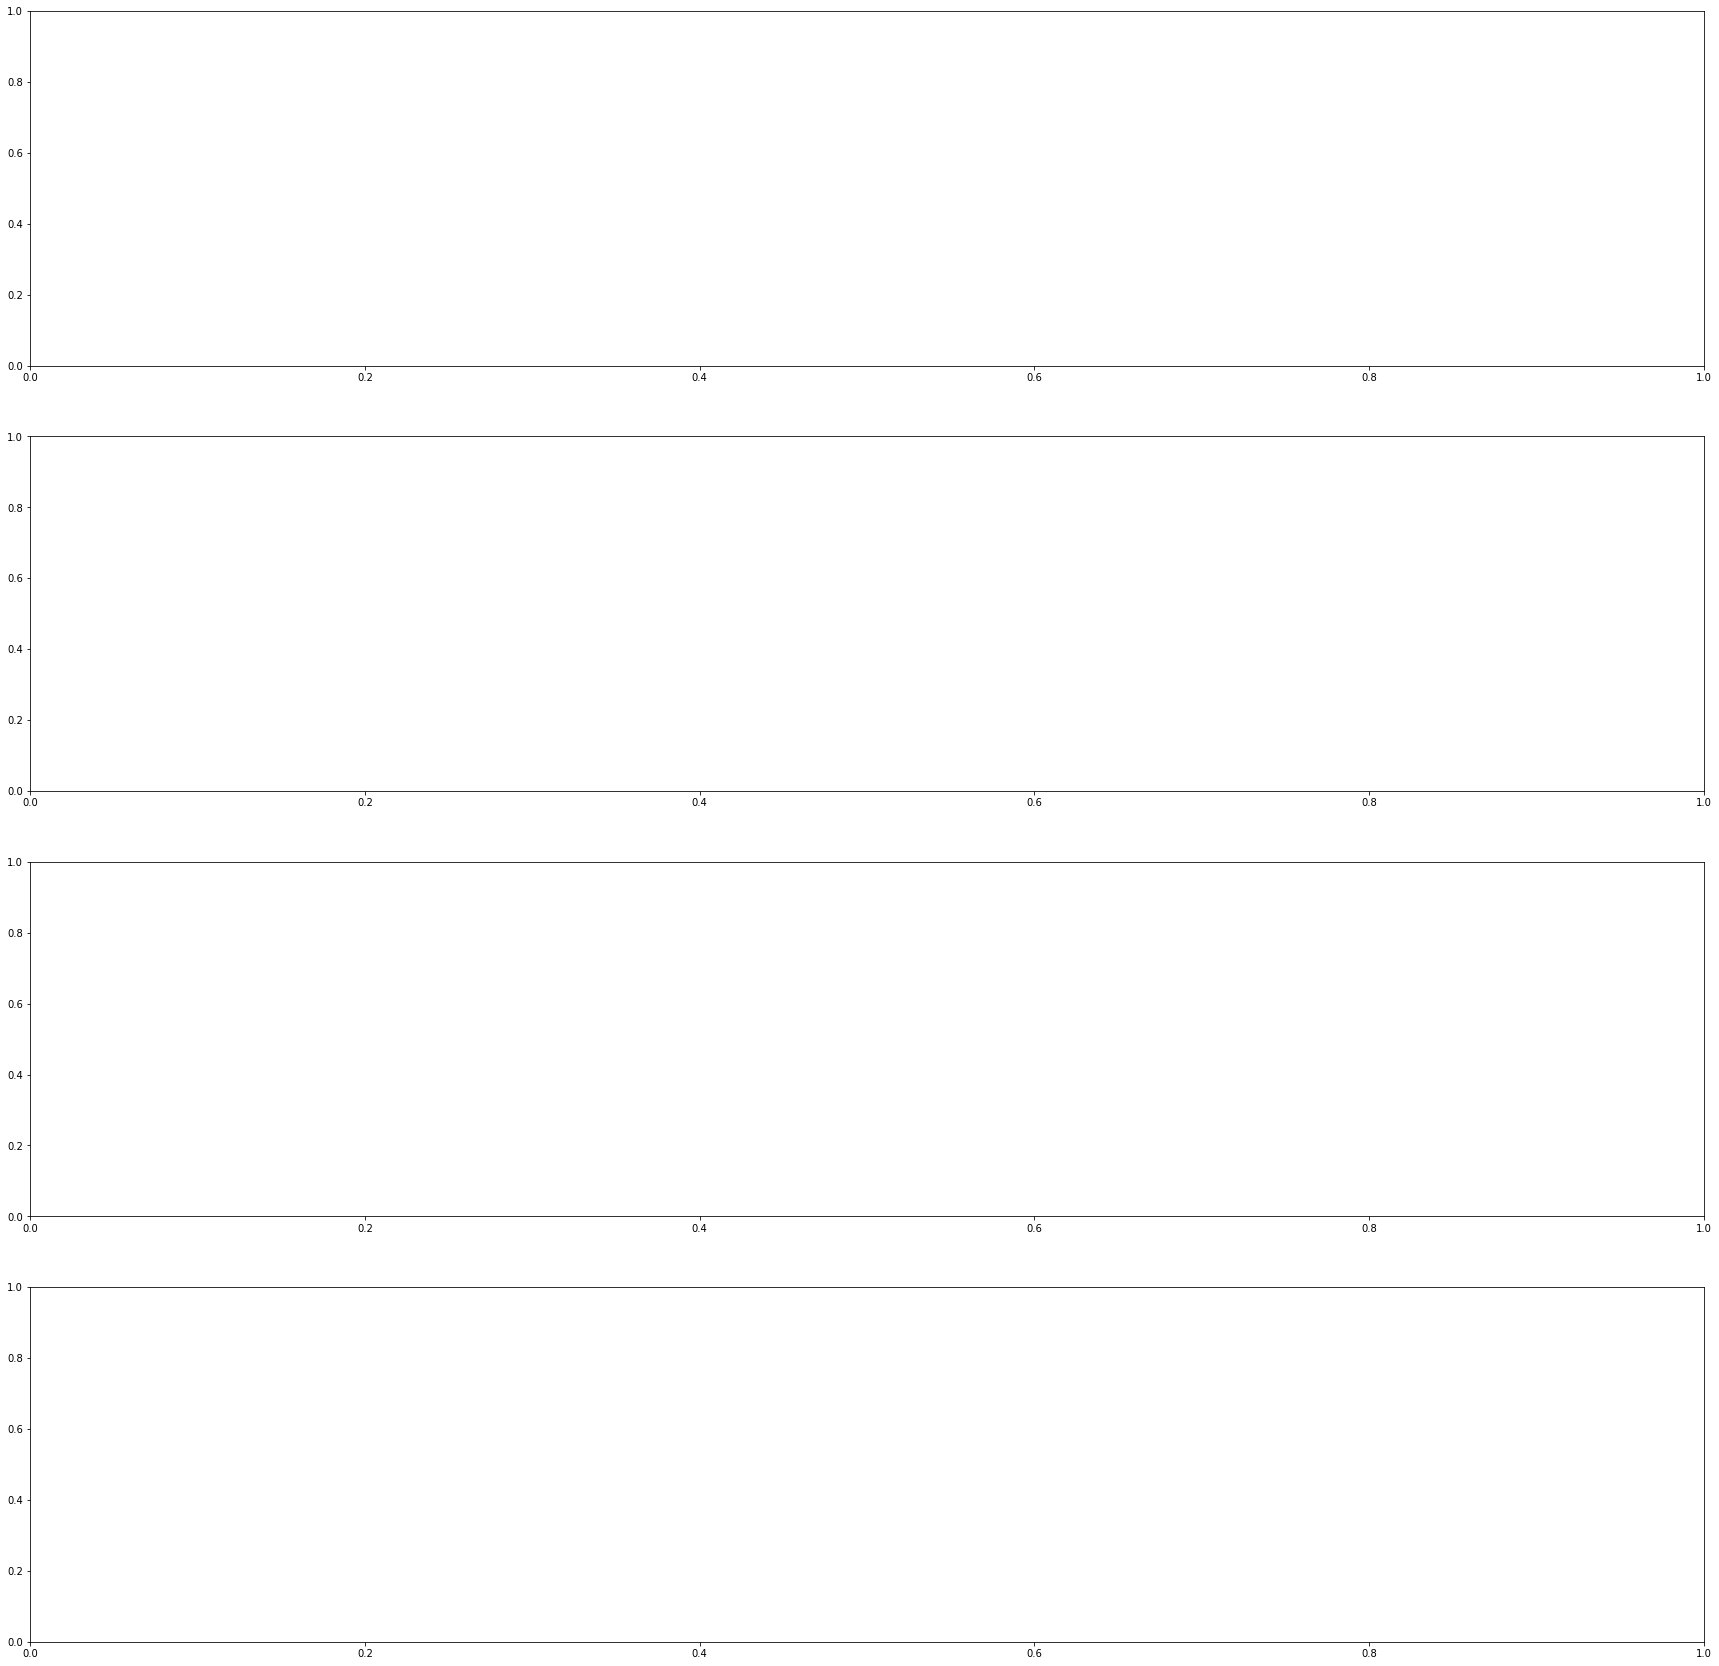

In [23]:
fig, axes = plt.subplots(4, figsize=(30, 30))
subplot_count = 0
for key, value in image_dict:
    axes[subplot_count].imshow(key, cmap='gray')
    axes[subplot_count].set_title(value.stem)
plt.show()

In [ ]:
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))
    axes[0].imshow(blurred, cmap='gray')
    axes[0].set_title(image_path.stem)
    axes[1].imshow(kmeans, cmap='gray')
    axes[1].set_title('kmeans')
    axes[2].imshow(otsu, cmap='gray')
    axes[2].set_title('otsu')
    plt.show()